In [30]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

In [26]:
from audio_similarity import AudioSimilarity

def get_similarity(original_path, compare_path):
    sample_rate = 44100

    audio_similarity = AudioSimilarity(original_path, compare_path, sample_rate)
    similarity_score = audio_similarity.stent_weighted_audio_similarity(metrics='all')

    return similarity_score

print(get_similarity("tracks/Zwicker - Made Up.mp3", "tracks/Verdé Sative _– Positive Cult (P-Gressive Mix).aiff"))

Loading comparison files:: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
Calculating zero crossing rate similarity...
Calculating rhythm similarity...
Calculating chroma similarity similarity...
Calculating energy envelope similarity...
Calculating spectral contrast similarity...
Calculating perceptual similarity...


{'zcr_similarity': 0.9938592519057305, 'rhythm_similarity': 0.5328887834107262, 'chroma_similarity': 0.7317208647727966, 'energy_envelope_similarity': 0.5035931239149818, 'spectral_contrast_similarity': 0.8764132261422413, 'perceptual_similarity': 0.5539232213929902, 'swass': 0.700479059302171}


In [27]:
df = pd.read_csv("tracks_similarity.csv")
df

,audio_track,target,estimated_similarity
0,tracks/05 - Shakedown - You Thing You Know.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0
1,tracks/04 - House Is Mine (Baby Doc Remix).aif,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0
2,tracks/010 - Casanovy - I Need Your Lovin' (Mi...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0
3,tracks/6 Transsylvanian Express.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0
4,tracks/01 - Natural Born Grooves - Universal L...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0
...,...,...,...
97,tracks/Bliss Inc - Subaquatic.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0
98,tracks/11 Flux - Strange Feelings.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0
99,tracks/10 - Little Computer People - Fly High.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0
100,tracks/04. Giorgio Maulini - Storyteller (Orig...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0


In [28]:
for index, row in tqdm(df.iterrows(), total=len(df)):
    similarity = get_similarity(row["target"], row["audio_track"])
    for key in similarity.keys():
        df.at[index, key] = similarity[key]

Loading original files:: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]
[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?
Loading comparison files:: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]
Calculating zero crossing rate similarity...
Calculating rhythm similarity...
Calculating chroma similarity similarity...
Calculating energy envelope similarity...
Calculating spectral contrast similarity...
Calculating perceptual similarity...
Loading comparison files:: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
Calculating zero crossing rate similarity...
Calculating rhythm similarity...
Calculating chroma similarity similarity...
Calculating energy envelope similarity...
Calculating spectral contrast similarity...
Calculating perceptual similarity...
Loading original files:: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]
Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 17869602.
Note: Trying to resync...
Note: Hit end of (available) data during resy

In [35]:
df.head()

,audio_track,target,estimated_similarity,zcr_similarity,rhythm_similarity,chroma_similarity,energy_envelope_similarity,spectral_contrast_similarity,perceptual_similarity,swass
0,tracks/05 - Shakedown - You Thing You Know.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,0.998120,0.547210,0.704054,0.512208,0.913623,0.595000,0.711460
1,tracks/04 - House Is Mine (Baby Doc Remix).aif,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,0.979888,0.545758,0.753346,0.503848,0.891524,0.574049,0.710146
2,tracks/010 - Casanovy - I Need Your Lovin' (Mi...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,0.940451,0.532377,0.719250,0.516835,0.924456,0.567681,0.696081
3,tracks/6 Transsylvanian Express.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,0.955719,0.548572,0.753488,0.500900,0.871572,0.616304,0.712064
4,tracks/01 - Natural Born Grooves - Universal L...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,0.927217,0.536180,0.754023,0.508868,0.908305,0.571159,0.699433


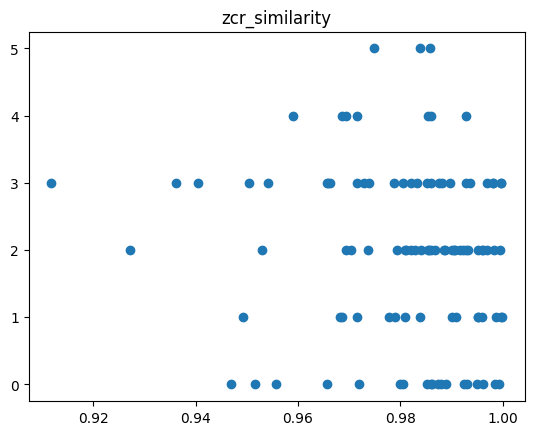

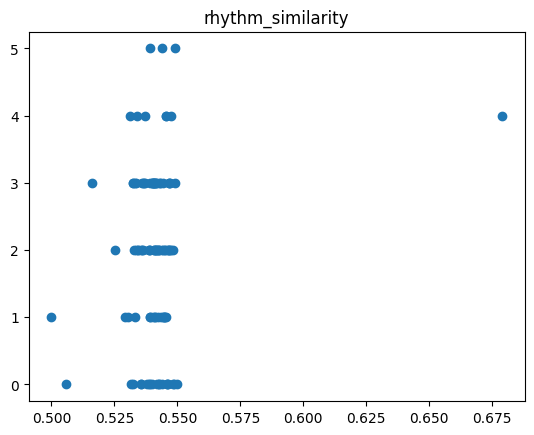

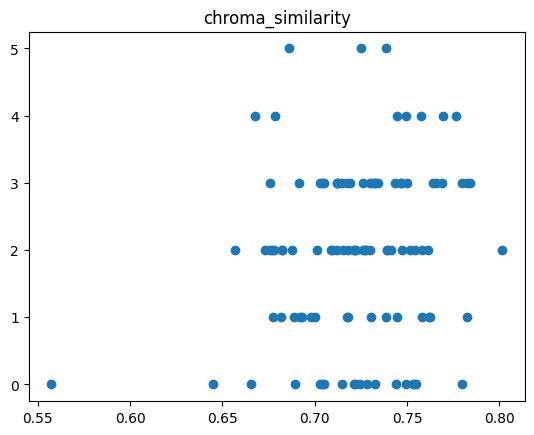

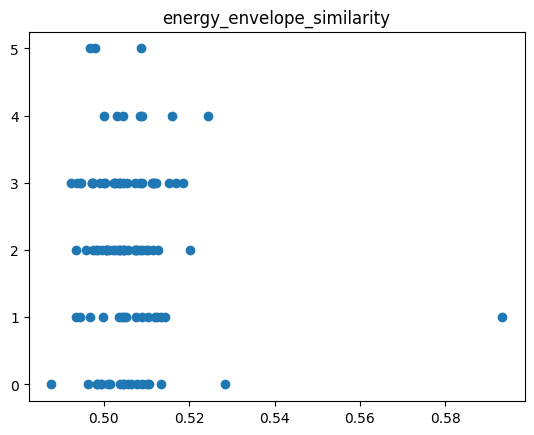

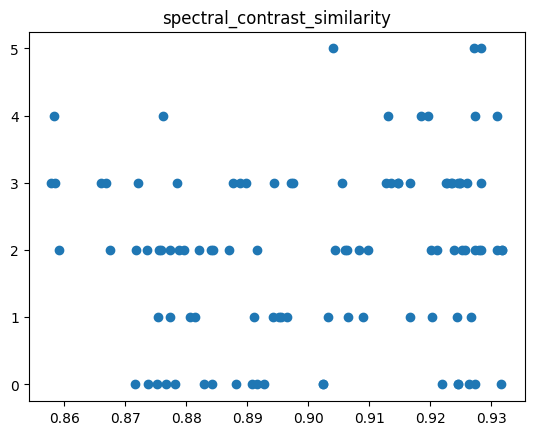

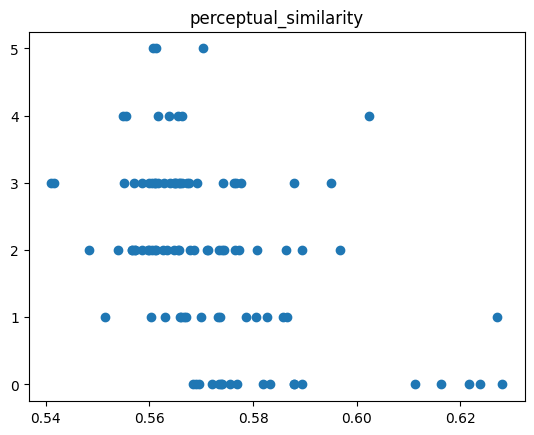

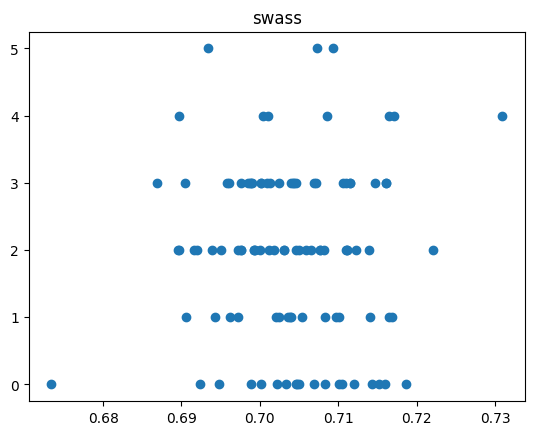

In [39]:
for key in ['zcr_similarity', 'rhythm_similarity', 'chroma_similarity', 'energy_envelope_similarity', 'spectral_contrast_similarity', 'perceptual_similarity', 'swass']:
    plt.title(key)
    plt.scatter(df[key], df["estimated_similarity"])
    plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features and target variable
X = df[['zcr_similarity', 'rhythm_similarity', 'chroma_similarity', 'energy_envelope_similarity', 'spectral_contrast_similarity', 'perceptual_similarity', 'swass']]
y = df['estimated_similarity'] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.1935483870967742

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00         3
         2.0       0.29      0.20      0.24        10
         3.0       0.33      0.40      0.36        10
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1

    accuracy                           0.19        31
   macro avg       0.10      0.10      0.10        31
weighted avg       0.20      0.19      0.19        31


Confusion Matrix:
[[0 1 2 2 0 0]
 [0 0 1 2 0 0]
 [4 1 2 3 0 0]
 [1 1 2 4 2 0]
 [1 0 0 1 0 0]
 [1 0 0 0 0 0]]


/Users/leopnt/Data/tracks_similarity/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leopnt/Data/tracks_similarity/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leopnt/Data/tracks_similarity/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

: 